<a href="https://colab.research.google.com/github/MelKanyi/Hypothesis-Testing/blob/master/Moringa_Data_Science_Core_W4_Independent_Project_2019_07_Kanyi_Melissa_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Autolib Electric Car Sharing Company Analysis

**Define the Question**

We will work as a Data Scientist for the Autolib electric car-sharing service company to investigate a claim about the blue cars from the provided Autolib dataset.

In an effort to do this, we need to identify some areas and periods of interest via sampling stating the reason to the choice of method, then perform hypothesis testing with regards to the claim that we will have made. 



**What is our hypothesis? (Research Question)**

Hypothesis testing (using a z-score).

A sample from each postal area has been used. A 95% confidence level has also been used to test the hypothesis.

*Null Hypothesis*: The number of Bluecars taken from postal code 75015 is the same as in postal code 75017 during weekdays


> (μ1=μ2)



*Alternative Hypothesis*: The number of Bluecars taken from postal code 75015 is not the same as in postal code 75017 during weekdays


> (μ1≠μ2)



**Metrics for Success**

Study is considered successful if the null hypothesis is true.

## **1.0 Upload the necessary libraries**

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from statsmodels.stats import weightstats as stests

## **1.1 Import the necessary datasets**

### 1.1.1 The Car Sharing Dataset Description

In [0]:
autolib_description = pd.read_excel('http://bit.ly/DSCoreAutolibDatasetGlossary')
autolib_description

,Column name,explanation
0,Postal code,postal code of the area (in Paris)
1,date,date of the row aggregation
2,n_daily_data_points,number of daily data poinst that were availabl...
3,dayOfWeek,identifier of weekday (0: Monday -> 6: Sunday)
4,day_type,weekday or weekend
5,BlueCars_taken_sum,Number of bluecars taken that date in that area
6,BlueCars_returned_sum,Number of bluecars returned that date in that ...
7,Utilib_taken_sum,Number of Utilib taken that date in that area
8,Utilib_returned_sum,Number of Utilib returned that date in that area
9,Utilib_14_taken_sum,Number of Utilib 1.4 taken that date in that area


### 1.1.2 The Car sharing Dataset

In [0]:
autolib = pd.read_csv('http://bit.ly/DSCoreAutolibDataset')
autolib.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [0]:
#Remove the whitespaces in the column names
autolib.columns = autolib.columns.str.lower().str.replace(' ', '_')

In [0]:
autolib.head(0)

,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum


####**What do we know about the Autolib dataset? (Exploratory Data Analysis)**

In [0]:
#The shape of the dataset
print("The shape of the dataset: ",autolib.shape)
print("16085 rows and 13 columns.")

The shape of the dataset:  (16085, 13)
16085 rows and 13 columns.


In [0]:
#The number of entries in each column and the column data type
autolib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
postal_code               16085 non-null int64
date                      16085 non-null object
n_daily_data_points       16085 non-null int64
dayofweek                 16085 non-null int64
day_type                  16085 non-null object
bluecars_taken_sum        16085 non-null int64
bluecars_returned_sum     16085 non-null int64
utilib_taken_sum          16085 non-null int64
utilib_returned_sum       16085 non-null int64
utilib_14_taken_sum       16085 non-null int64
utilib_14_returned_sum    16085 non-null int64
slots_freed_sum           16085 non-null int64
slots_taken_sum           16085 non-null int64
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [0]:
#Find out if there are missing values.
autolib.isnull().sum()

postal_code               0
date                      0
n_daily_data_points       0
dayofweek                 0
day_type                  0
bluecars_taken_sum        0
bluecars_returned_sum     0
utilib_taken_sum          0
utilib_returned_sum       0
utilib_14_taken_sum       0
utilib_14_returned_sum    0
slots_freed_sum           0
slots_taken_sum           0
dtype: int64

There seem to be no missing values in the Autolib dataset.
No missing values, no anomalies detected. 

In [0]:
#What unique values are there in each column entry in the dataset?
for i in autolib.columns:
 print(autolib[i].unique())
 print ("\n")

[75001 75002 75003 75004 75005 75006 75007 75008 75009 75010 75011 75012
 75013 75014 75015 75016 75017 75018 75019 75020 75112 75116 78000 78140
 78150 91330 91370 91400 92000 92100 92110 92120 92130 92140 92150 92160
 92170 92190 92200 92210 92220 92230 92240 92250 92260 92270 92290 92300
 92310 92320 92330 92340 92350 92360 92370 92380 92390 92400 92410 92420
 92500 92600 92700 92800 93100 93110 93130 93150 93170 93200 93230 93260
 93300 93310 93350 93360 93370 93390 93400 93440 93500 93600 93700 93800
 94000 94100 94110 94120 94130 94140 94150 94160 94220 94230 94300 94340
 94410 94450 94500 94700 94800 95100 95870 95880]


['1/1/2018' '1/2/2018' '1/3/2018' '1/4/2018' '1/5/2018' '1/6/2018'
 '1/7/2018' '1/8/2018' '1/9/2018' '1/10/2018' '1/11/2018' '1/12/2018'
 '1/13/2018' '1/14/2018' '1/15/2018' '1/16/2018' '1/17/2018' '1/18/2018'
 '1/19/2018' '1/20/2018' '1/21/2018' '1/22/2018' '1/23/2018' '1/24/2018'
 '1/25/2018' '1/26/2018' '1/27/2018' '1/28/2018' '1/29/2018' '1/30/2018'
 '1/31/2

All entries in the dataset seem to be valid and there are no NaN values present.

## **1.2 Univariate Analysis**

In [0]:
#Load the first 2 values in the dataset
autolib.head(2)

,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22


In [0]:
#Load the last 2 values in the dataset
autolib.tail(2)

,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [0]:
#Description of all the numerical data columns
auto_num = autolib.describe()
auto_num

,postal_code,n_daily_data_points,dayofweek,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


#### 1.2.1 Descriptive Analysis of the bluecars_taken_sum and the bluecars_returned_sum column

**Mean, Mode and Median**

In [0]:
#Mode
autolib.bluecars_taken_sum.mode()

0    12
dtype: int64

In [0]:
#Mode
autolib.bluecars_returned_sum.mode()

0    13
dtype: int64

In [0]:
#Median
autolib.bluecars_taken_sum.median()

46.0

In [0]:
#Median
autolib.bluecars_returned_sum.median()

46.0

In [0]:
#Mean
autolib.bluecars_taken_sum.mean()

125.92695057506994

In [0]:
#Mean
autolib.bluecars_returned_sum.mean()

125.912713708424

**Range**

In [0]:
#Find the range between the maximum and minimum value

maximum_value = autolib.bluecars_taken_sum.max()
minimum_value = autolib.bluecars_taken_sum.min()
col_range = maximum_value - minimum_value

print(col_range)

1352


**Inter-Quartile Range**

In [0]:
#Find the quartiles of the bluecars_taken_sum column

autolib.bluecars_taken_sum.quantile([0.25, 0.5, 0.75])

0.25     20.0
0.50     46.0
0.75    135.0
Name: bluecars_taken_sum, dtype: float64

In [0]:
#Find the quartiles of the bluecars_returned_sum column

autolib.bluecars_returned_sum.quantile([0.25, 0.5, 0.75])

0.25     20.0
0.50     46.0
0.75    135.0
Name: bluecars_returned_sum, dtype: float64

**Standard Deviation, Variance, Kurtosis and Skewness**

In [0]:
print("The Standard Deviation: ",autolib.bluecars_taken_sum.std())
print("The Variance: ",autolib.bluecars_taken_sum.var())
print("The Kurtosis: ",autolib.bluecars_taken_sum.kurt())
print("The Skewness: ",autolib.bluecars_taken_sum.skew())

The Standard Deviation:  185.42657876727893
The Variance:  34383.01611333789
The Kurtosis:  6.172692305510042
The Skewness:  2.4063548974959086


In [0]:
print("The Standard Deviation: ",autolib.bluecars_returned_sum.std())
print("The Variance: ",autolib.bluecars_returned_sum.var())
print("The Kurtosis: ",autolib.bluecars_returned_sum.kurt())
print("The Skewness: ",autolib.bluecars_returned_sum.skew())

The Standard Deviation:  185.50153480148427
The Variance:  34410.819413706275
The Kurtosis:  6.1862880957582345
The Skewness:  2.412084978838923


The Kurtosis is > 0 meaning it is leptokurtic, the tail in this distribution is heavy.

**Visualization of the bluecars_taken_sum column**

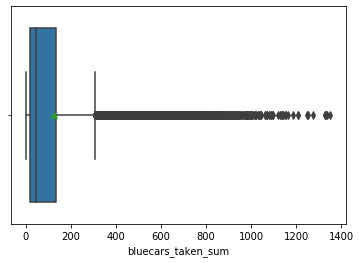

In [0]:
#Boxplot
sns.boxplot(autolib['bluecars_taken_sum'],showmeans = True)

There seems to be numerous outliers beyond the threshold. Let's try actually confirm the presence of outliers.

In [0]:
#Check for outliers in the household_size column

Q1 = autolib.bluecars_taken_sum.quantile(0.25)
Q3 = autolib.bluecars_taken_sum.quantile(0.75)

IQR = Q3 - Q1

outliers = ((autolib.bluecars_taken_sum < Q1 - 1.5 * IQR) | (autolib.bluecars_taken_sum > Q3 + 1.5 * IQR))
outliers.value_counts()

False    13870
True      2215
Name: bluecars_taken_sum, dtype: int64

There are 2215 outliers beyond the range threshold. However it would result in an inconclusive outcome if the outliers are actually removed since they can actually be viable entries.

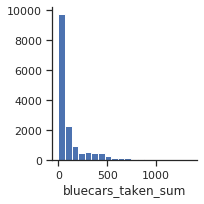

In [0]:
#Plot histogram showing distribution of the BlueCars taken column
sns.set(style='ticks', color_codes=True)
bt_hist = sns.FacetGrid(autolib)
bt_hist.map(plt.hist, 'bluecars_taken_sum', bins=20)

**Visualization of the bluecars_returned_sum column**

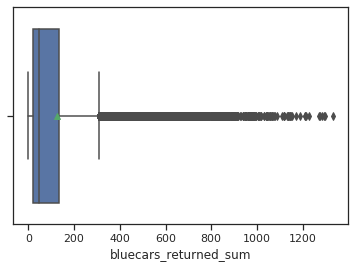

In [0]:
#Boxplot
sns.boxplot(autolib['bluecars_returned_sum'],showmeans = True)

There seems to be numerous outliers beyond the threshold. Let's try actually confirm the presence of outliers.

In [0]:
#Check for outliers in the household_size column

Q1 = autolib.bluecars_returned_sum.quantile(0.25)
Q3 = autolib.bluecars_returned_sum.quantile(0.75)

IQR = Q3 - Q1

outliers = ((autolib.bluecars_returned_sum < Q1 - 1.5 * IQR) | (autolib.bluecars_returned_sum > Q3 + 1.5 * IQR))
outliers.value_counts()

False    13872
True      2213
Name: bluecars_returned_sum, dtype: int64

There are 2213 outliers beyond the range threshold. However it would result in an inconclusive outcome if the outliers are actually removed since they can actually be viable entries.

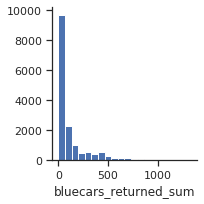

In [0]:
#Plot histogram showing distribution of the BlueCars taken column
sns.set(style='ticks', color_codes=True)
bt_hist = sns.FacetGrid(autolib)
bt_hist.map(plt.hist, 'bluecars_returned_sum', bins=20)

**Recommendations based on the Univariate Analysis**

The taken_sum columns and the returned_sum columns seem to be very similar.

The Kurtosis of the numerical data columns show that the distribution of the data is heavy-tailed and in most cases, is not normally distributed.

Outliers are viable entries and should not be dropped.

## **1.3 Bivariate Analysis**

### 1.3.1 Numerical & Numerical Analysis

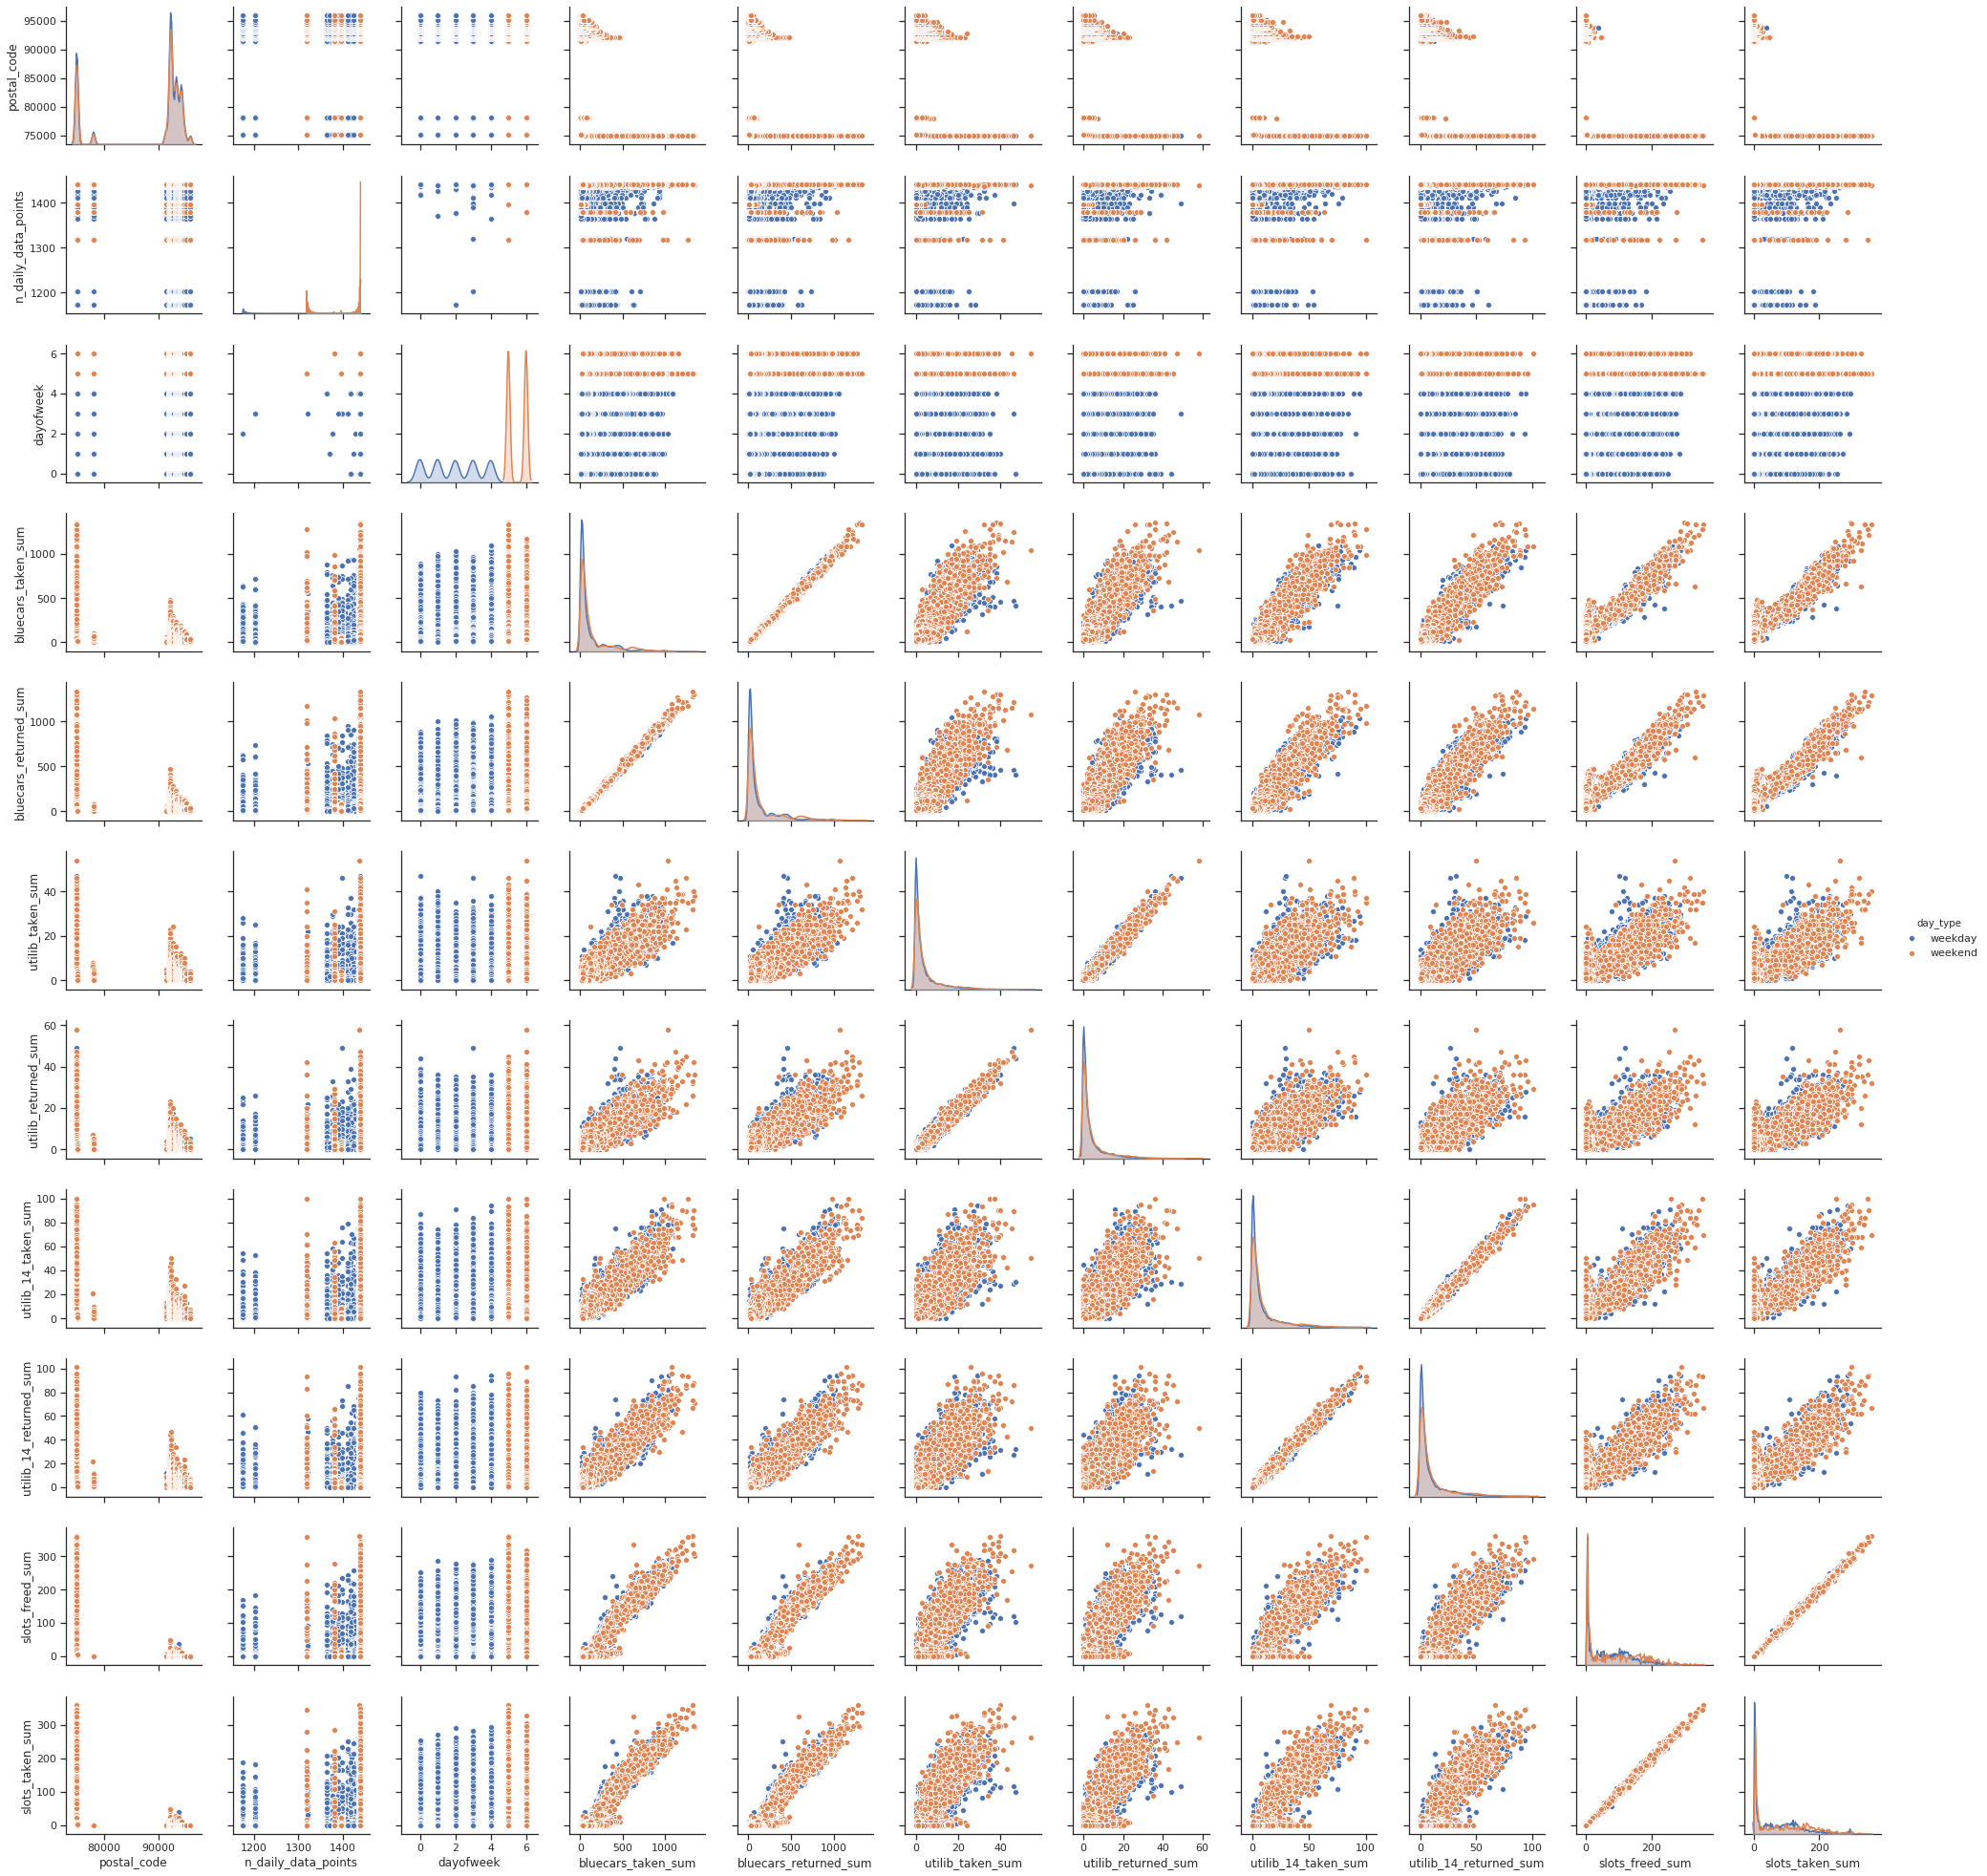

In [0]:
sns.pairplot(autolib,hue = 'day_type')

Positive correlation is observed in the cars taken vs. cars returned columns i.e. Bluecars, Utilib and Utilib 14.

**Correlation**

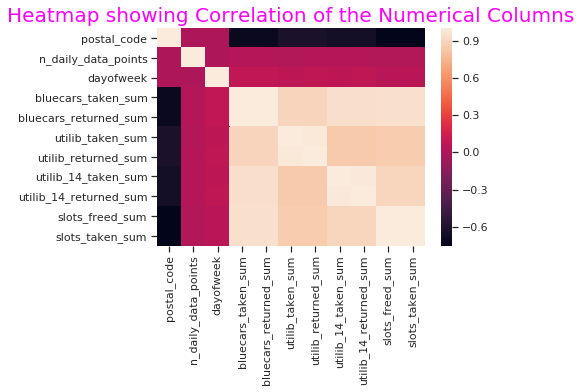

In [0]:
coeff = autolib.corr()

plt.figure()
sns.heatmap(coeff, xticklabels=coeff.columns, yticklabels=coeff.columns)
plt.title('Heatmap showing Correlation of the Numerical Columns', color = 'magenta', fontsize = 20)
plt.show()

## **1.4 Multivariate Analysis**

**Using Ordinary Least Squares**

In [0]:
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

#Split the categories into X and y
X = autolib.drop(['date', 'postal_code'], axis =1)
y = autolib['postal_code'].astype('int')

#Convert the categorical columns into binary formats
X1 =pd.get_dummies(X)

#Standardize the X values
sc = StandardScaler()
X = sc.fit_transform(X1)

#Implement the ordinary least squares
X2 = sm.add_constant(X)
model = sm.OLS(y, X2).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:            postal_code   R-squared:                       0.566
Model:                            OLS   Adj. R-squared:                  0.565
Method:                 Least Squares   F-statistic:                     1902.
Date:                Mon, 23 Dec 2019   Prob (F-statistic):               0.00
Time:                        07:18:27   Log-Likelihood:            -1.5995e+05
No. Observations:               16085   AIC:                         3.199e+05
Df Residuals:                   16073   BIC:                         3.200e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.879e+04     39.759   2233.237      0.0

The R2 score is 56.6% meaning the model can predict with 56.6% accuracy which postal area code will be used.

## **1.5 Hypothesis Testing**

**What is our hypothesis?**

Hypothesis testing (using a z-score).

A sample of 1000 values from each postal area has been used. A 95% confidence level has also been used to test the hypothesis.

*Null Hypothesis*: The number of Bluecars taken from postal code 75015 is the same as in postal code 75017 during weekdays


> μ1=μ2



*Alternative Hypothesis*: The number of Bluecars taken from postal code 75015 is not the same as in postal code 75017 during weekdays


> μ1≠μ2



**Sampling**

I chose to use Simple Random Sampling. *Why?* Random samples are the best method of selecting your sample from the population of interest. The advantages are that your sample represents the target population and eliminates sampling bias.

In [0]:
#Select a sample from the autolib dataset. (Technique : Simple Random Sampling)
df_sample = autolib.sample(n=1000,replace='False')
print(df_sample)

       postal_code       date  ...  slots_freed_sum  slots_taken_sum
12678        93700  1/24/2018  ...                0                0
1345         75009  4/11/2018  ...              105              100
1295         75009  2/17/2018  ...              116              114
3371         75116   4/9/2018  ...                2                3
2362         75016  1/23/2018  ...              166              168
...            ...        ...  ...              ...              ...
5100         92130  4/25/2018  ...                6                6
9600         92600  4/15/2018  ...                0                0
11752        93360  4/19/2018  ...                0                0
2951         75019   6/7/2018  ...              139              135
9300         92420  4/27/2018  ...                0                0

[1000 rows x 13 columns]


In [0]:
#Mean of the sample
df_sample.bluecars_taken_sum.mean()

121.045

In [0]:
#Standard deviation of the sample
df_sample.bluecars_taken_sum.std()

175.10021433470624

In [0]:
df_null1 = df_sample[(df_sample.postal_code == 75015) & (df_sample.day_type == 'weekday')]
df_null1


,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
2279,75015,4/9/2018,1440,0,weekday,839,806,21,18,41,49,222,217
2302,75015,5/2/2018,1440,2,weekday,865,854,18,22,63,65,229,231
2302,75015,5/2/2018,1440,2,weekday,865,854,18,22,63,65,229,231
2308,75015,5/8/2018,1425,1,weekday,931,907,21,20,67,68,257,246
2290,75015,4/20/2018,1417,4,weekday,936,857,16,16,63,54,220,215


In [0]:
df_null2 = df_sample[(df_sample.postal_code == 75017) & (df_sample.day_type == 'weekday')]
df_null2

,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
2591,75017,4/9/2018,1440,0,weekday,710,684,20,17,43,39,195,185
2605,75017,4/23/2018,1417,0,weekday,594,554,20,21,25,25,158,153
2623,75017,5/22/2018,1438,1,weekday,770,768,14,9,50,44,216,213
2503,75017,1/8/2018,1438,0,weekday,612,605,13,11,38,37,146,140
2606,75017,4/24/2018,1439,1,weekday,686,656,22,22,44,45,167,161
2645,75017,6/13/2018,1440,2,weekday,777,765,21,23,42,42,203,202
2506,75017,1/11/2018,1440,3,weekday,713,714,12,11,32,35,154,156


Mean of the population = 125.92695057506994

Sample size = 1000

Sample mean = 123.275

Standard deviation of the sample = 187.76313901128586

Confidence interval = 0.05

z-score = -0.44
p-value = 0.33(x2 since it's two-tailed) = 0.66

0.66 > 0.05

Not enough evidence to reject the null hypothesis.

*The null hypothesis is therefore taken to be true i.e. The number of Bluecars taken from postal code 75015 is the same as in postal code 75017 during weekdays*

 